In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings
#used for plots
from scipy import stats
from mplsoccer import PyPizza, FontManager

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("england_defender_radardata.csv", index_col=0)
df

,playerId,minutesPlayed,ground_duels_won,ground_duels,fouls_committed,air_duels,air_duels_won,duels_won_own_half,fouls_committed_own_half,interceptions,...,ground_duels_won_adjusted_per90,ground_duels_adjusted_per90,fouls_committed_adjusted_per90,air_duels_adjusted_per90,air_duels_won_adjusted_per90,duels_won_own_half_adjusted_per90,fouls_committed_own_half_adjusted_per90,interceptions_adjusted_per90,vs_dribbles_adjusted_per90,won_vs_dribbles_adjusted_per90
0,36,1238,17.0,75.0,8.0,55.0,23.0,36.0,6.0,6.0,...,3.069969,13.543979,1.444691,9.932251,4.153487,6.501110,1.083518,1.083518,7.404042,1.986450
1,48,3343,71.0,212.0,20.0,213.0,137.0,168.0,12.0,23.0,...,4.746548,14.172793,1.337056,14.239645,9.158833,11.231270,0.802234,1.537614,4.612843,1.270203
2,8292,838,12.0,61.0,11.0,17.0,7.0,11.0,6.0,7.0,...,3.370792,17.134861,3.089893,4.775289,1.966296,3.089893,1.685396,1.966296,7.303384,1.685396
3,8945,2009,28.0,158.0,18.0,84.0,41.0,55.0,8.0,8.0,...,3.008310,16.975461,1.933913,9.024929,4.405025,5.909180,0.859517,0.859517,8.487731,1.504155
4,25785,1484,35.0,153.0,19.0,91.0,51.0,61.0,9.0,8.0,...,5.421722,23.700669,2.943220,14.096476,7.900223,9.449286,1.394157,1.239251,10.223818,1.703970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,9285,3164,42.0,166.0,6.0,107.0,52.0,72.0,3.0,19.0,...,2.306922,9.117834,0.329560,5.877158,2.856189,3.954723,0.164780,1.043608,4.778624,0.988681
132,134102,3539,61.0,227.0,27.0,239.0,120.0,150.0,15.0,18.0,...,2.970612,11.054571,1.314861,11.638953,5.843826,7.304782,0.730478,0.876574,4.236774,0.925272
133,25885,457,10.0,28.0,4.0,22.0,18.0,22.0,2.0,4.0,...,3.559482,9.966551,1.423793,7.830861,6.407068,7.830861,0.711896,1.423793,4.271379,2.135689
134,49859,805,12.0,60.0,7.0,26.0,14.0,23.0,4.0,8.0,...,2.660443,13.302214,1.551925,5.764293,3.103850,5.099182,0.886814,1.773629,7.316218,1.108518


In [4]:
team = "Tottenham Hotspur"
team_defenders = df.loc[df["teamName"] == team]["shortName"].tolist()
team_defenders

['T. Alderweireld',
 'J. Vertonghen',
 'D. Rose',
 'K. Trippier',
 'S. Aurier',
 'B. Davies',
 'D. S\\u00e1nchez']

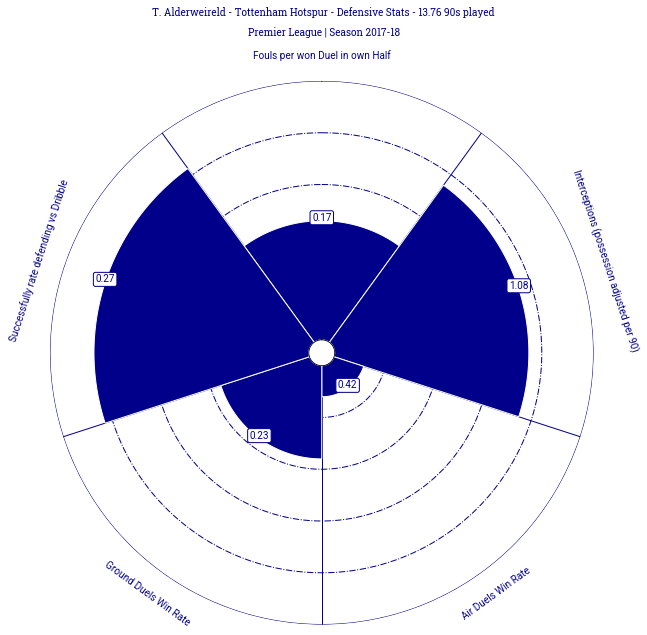

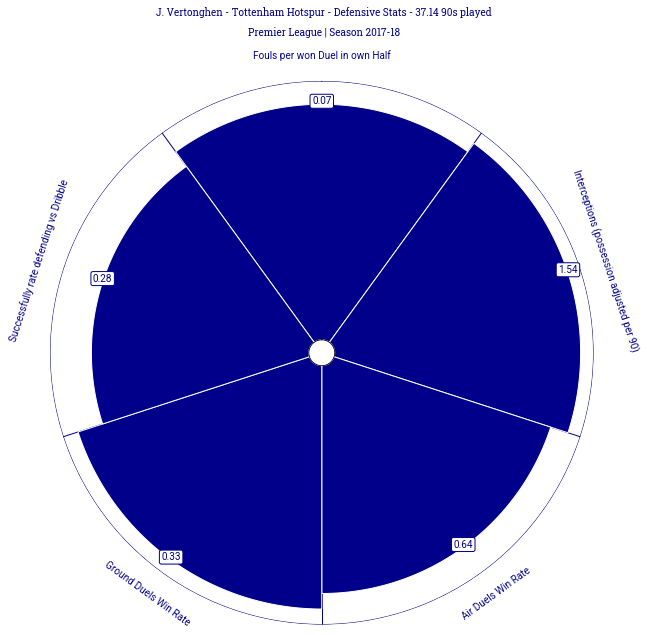

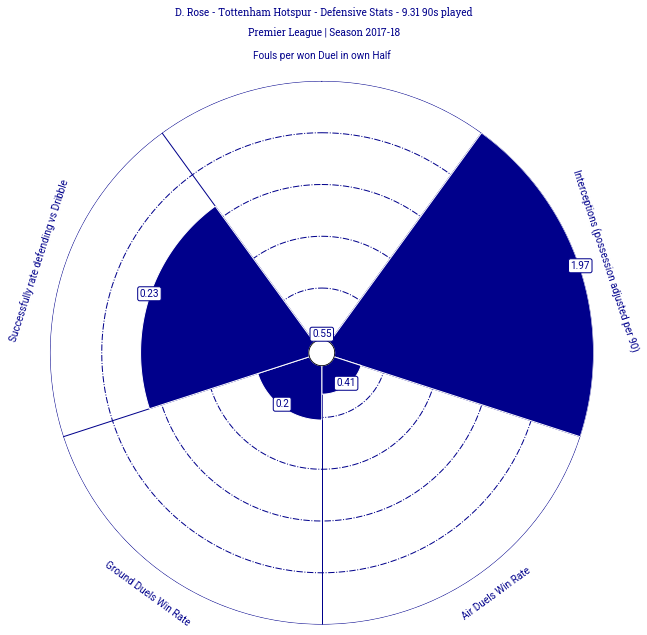

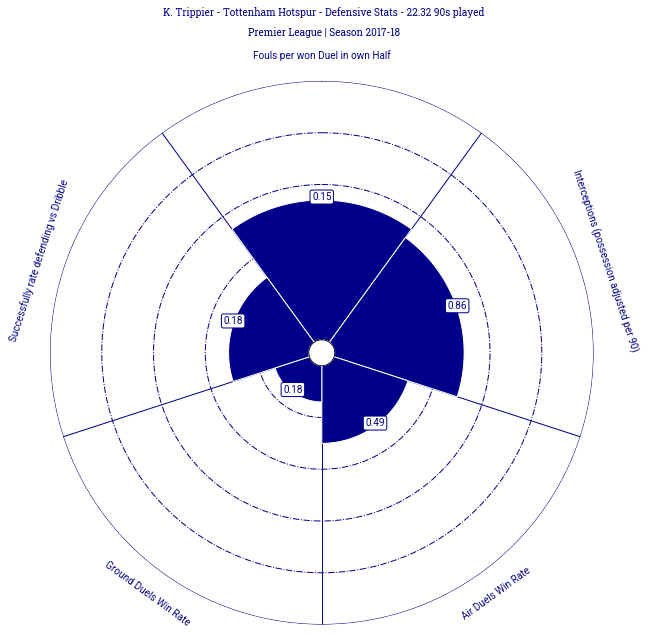

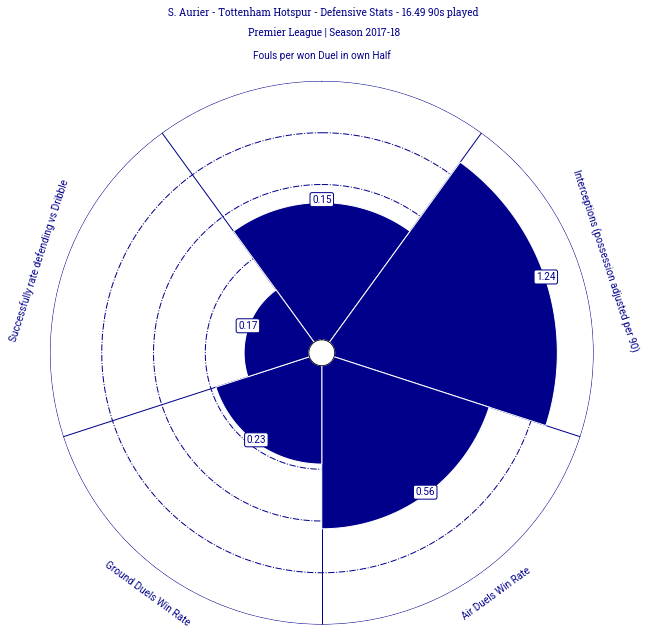

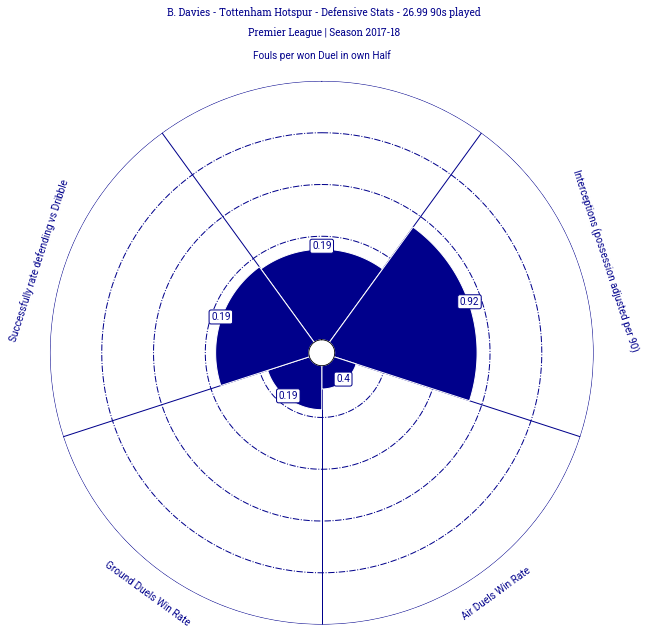

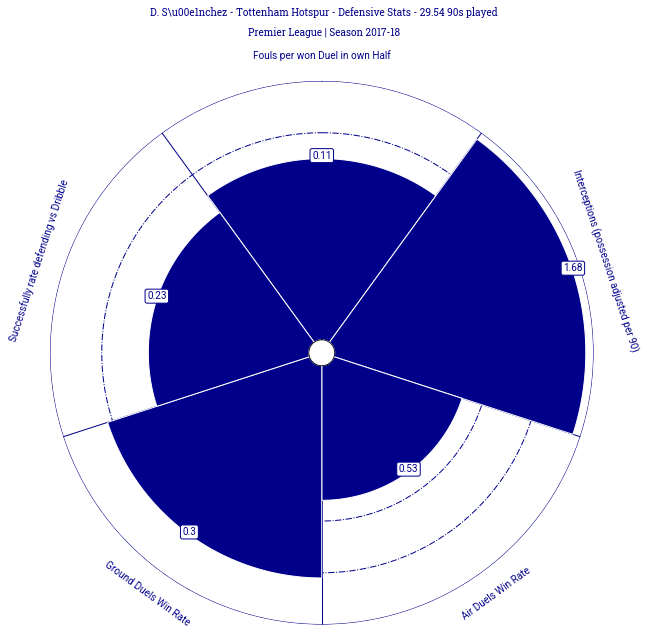

In [43]:
for player in team_defenders:
    player_df = df.loc[df["shortName"] == player]
    player_df = player_df[["minutesPlayed","foul_per_won_duel_own_half","interceptions_adjusted_per90","air_duels_won%","ground_duels_won%","won_vs_dribbles%"]]
    nineties = round(player_df.iloc[0,0]/90,2)
    player_columns = player_df.columns[1:]
    player_values = [round(player_df[column].iloc[0],2) for column in player_columns]
    percentiles = [int(stats.percentileofscore(df[column], player_df[column].iloc[0])) for column in player_columns]
    percentiles[0] = 100 - percentiles[0]

    #list of names on plots
    names = ["Fouls per won Duel in own Half", "Interceptions (possession adjusted per 90)", "Air Duels Win Rate", "Ground Duels Win Rate", "Success rate defending vs Dribbles"]
    slice_colors = ["darkblue"] * 5
    text_colors = ["darkblue"]*5
    textbox_colors = ["white"]*5
    font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                               "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
    font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                             "RobotoSlab%5Bwght%5D.ttf?raw=true"))
    #PIZZA PLOT
    baker = PyPizza(
        params=names,
        min_range = None,
        max_range = None,               # list of parameters
        background_color="white",
        straight_line_color="darkblue",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_color="darkblue",
        last_circle_lw=1,               # linewidth of last circle
        other_circle_color="darkblue",
        other_circle_lw=1,              # linewidth for other circles
        other_circle_ls="-."            # linestyle for other circles
    )

    #making pizza for our data
    fig, ax = baker.make_pizza(
        percentiles,              # list of values
        figsize=(10, 10),      # adjust figsize according to your need
        param_location=110,
        slice_colors=slice_colors,
        value_colors = text_colors,
        value_bck_colors=textbox_colors, # where the parameters will be added
        kwargs_slices=dict(
            facecolor="white", edgecolor="white",
            zorder=2, linewidth=1
        ),                   # values to be used when plotting slices
        kwargs_params=dict(
            color="darkblue", fontsize=12,
            fontproperties=font_normal.prop, va="center"
        ),                   # values to be used when adding parameter
        kwargs_values=dict(
            color="white", fontsize=12,
            fontproperties=font_normal.prop, zorder=3,
            bbox=dict(
                facecolor="white",edgecolor="darkblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )                    # values to be used when adding parameter-values
    )

    #putting text
    texts = baker.get_value_texts()
    for i, text in enumerate(texts):
        text.set_text(str(player_values[i]))
    # add title
    fig.text(
        0.515, 0.97, f"{player} - Tottenham Hotspur - Defensive Stats - {nineties} 90s played", size=18,
        ha="center", fontproperties=font_bold.prop, color="darkblue"
    )

    # add subtitle
    fig.text(
        0.515, 0.942,
        "Premier League | Season 2017-18",
        size=15,
        ha="center", fontproperties=font_bold.prop, color="darkblue"
    )
    plt.show()

In [3]:
team = "Brighton & Hove Albion"
player_names = df.loc[df["teamName"] == team]["shortName"].tolist()
positions = ['RB','CB','CB','RB','LB','LB']
market_values = [0.75,12,10,4.5,1.5,2.5]
ages = [36,25,25,28,29,30]
team_defenders = pd.DataFrame({'name':player_names,'position':positions,'value':market_values,'age':ages})
team_defenders

,name,position,value,age
0,Bruno Saltor,RB,0.75,36
1,S. Duffy,CB,12.00,25
2,L. Dunk,CB,10.00,25
3,E. Schelotto,RB,4.50,28
4,G. Bong,LB,1.50,29
5,M. Suttner,LB,2.50,30


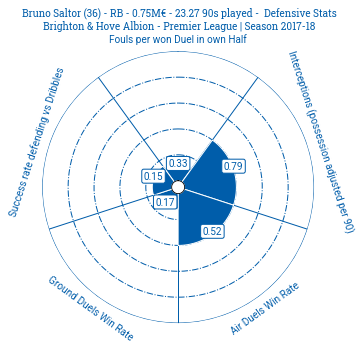

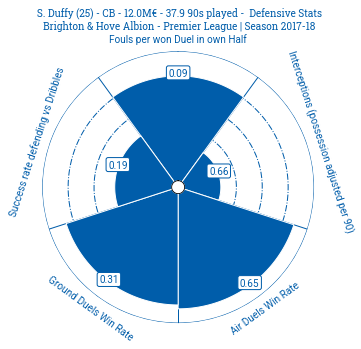

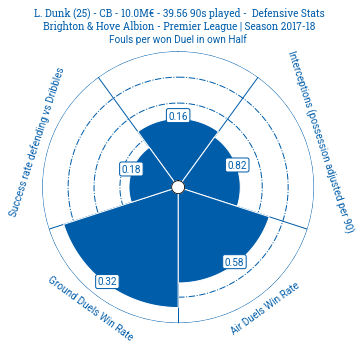

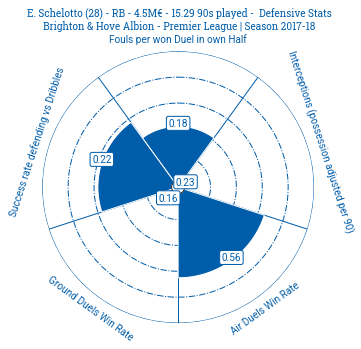

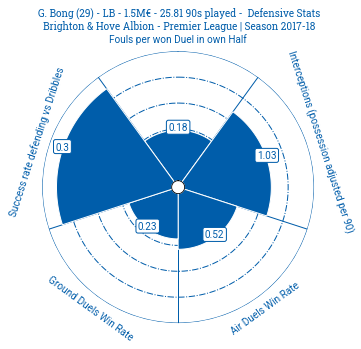

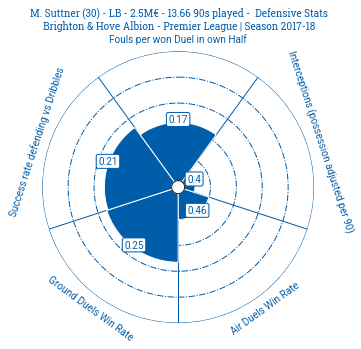

In [10]:
team_percentiles = []
for player in player_names:
    player_df = df.loc[df["shortName"] == player]
    player_df = player_df[["minutesPlayed","foul_per_won_duel_own_half","interceptions_adjusted_per90","air_duels_won%","ground_duels_won%","won_vs_dribbles%"]]
    nineties = round(player_df.iloc[0,0]/90,2)
    player_columns = player_df.columns[1:]
    player_values = [round(player_df[column].iloc[0],2) for column in player_columns]
    percentiles = [int(stats.percentileofscore(df[column], player_df[column].iloc[0])) for column in player_columns]
    percentiles[0] = 100 - percentiles[0]
    team_percentiles.append([player]+percentiles)

    #list of names on plots
    names = ["Fouls per won Duel in own Half", "Interceptions (possession adjusted per 90)", "Air Duels Win Rate", "Ground Duels Win Rate", "Success rate defending vs Dribbles"]
    slice_colors = ["#005DAA"] * 5
    text_colors = ["#005DAA"]*5
    textbox_colors = ["white"]*5
    font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                               "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
    font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                             "RobotoSlab%5Bwght%5D.ttf?raw=true"))
    #PIZZA PLOT
    baker = PyPizza(
        params=names,
        min_range = None,
        max_range = None,               # list of parameters
        background_color="white",
        straight_line_color="#005DAA",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_color="#005DAA",
        last_circle_lw=1,               # linewidth of last circle
        other_circle_color="#005DAA",
        other_circle_lw=1,              # linewidth for other circles
        other_circle_ls="-."            # linestyle for other circles
    )

    #making pizza for our data
    fig, ax = baker.make_pizza(
        percentiles,              # list of values
        figsize=(5, 5),      # adjust figsize according to your need
        param_location=110,
        slice_colors=slice_colors,
        value_colors = text_colors,
        value_bck_colors=textbox_colors, # where the parameters will be added
#        color_blank_space=["#005DAA"]*5,
#        blank_alpha=1,
        kwargs_slices=dict(
            facecolor="#005DAA", edgecolor="white",
            zorder=2, linewidth=1
        ),                   # values to be used when plotting slices
        kwargs_params=dict(
            color="#005DAA", fontsize=18,
            fontproperties=font_normal.prop, va="center"
        ),                   # values to be used when adding parameter
        kwargs_values=dict(
            color="#005DAA", fontsize=18,
            fontproperties=font_normal.prop, zorder=3,
            bbox=dict(
                facecolor="white",edgecolor="#005DAA",
                boxstyle="round,pad=0.2", lw=1
            )
        )                    # values to be used when adding parameter-values
    )

    extras = team_defenders.loc[team_defenders["name"] == player]
    position = extras.iloc[0,1]
    value = extras.iloc[0,2]
    age = extras.iloc[0,3]

    #putting text
    texts = baker.get_value_texts()
    for i, text in enumerate(texts):
        text.set_text(str(player_values[i]))
    # add title
    fig.text(
        0.515, 0.98, f"{player} ({age}) - {position} - {value}M€ - {nineties} 90s played -  Defensive Stats", size=30,
        ha="center", fontproperties=font_bold.prop, color="#005DAA"
    )

    # add subtitle
    fig.text(
        0.515, 0.942,
        "Brighton & Hove Albion - Premier League | Season 2017-18",
        size=21,
        ha="center", fontproperties=font_bold.prop, color="#005DAA"
    )
    plt.savefig(f"{player}_radar.png")
    plt.show()

In [5]:
team_percentiles_df = pd.DataFrame(team_percentiles,columns=["name","foul_per_won_duel_own_half","interceptions_adjusted_per90","air_duels_won%","ground_duels_won%","won_vs_dribbles%"])
team_percentiles_df

,name,foul_per_won_duel_own_half,interceptions_adjusted_per90,air_duels_won%,ground_duels_won%,won_vs_dribbles%
0,Bruno Saltor,11,40,40,12,15
1,S. Duffy,81,28,89,86,44
2,L. Dunk,48,43,69,88,33
3,E. Schelotto,42,1,65,8,57
4,G. Bong,39,67,43,35,89
5,M. Suttner,45,8,20,53,52


In [8]:
team_percentiles_df = team_percentiles_df.drop([0,5])
team_percentiles_df

,name,foul_per_won_duel_own_half,interceptions_adjusted_per90,air_duels_won%,ground_duels_won%,won_vs_dribbles%
1,S. Duffy,81,28,89,86,44
2,L. Dunk,48,43,69,88,33
3,E. Schelotto,42,1,65,8,57
4,G. Bong,39,67,43,35,89


In [9]:
for i in [1,2,3,4,5]:
    column = team_percentiles_df.columns[i]
    team_percentiles_df = team_percentiles_df.sort_values(column, ascending=False)
    print(f"{column}:")
    print(f"Highest: {team_percentiles_df.iloc[0,0]}: {team_percentiles_df.iloc[0,i]}")
    print(f"Lowest: {team_percentiles_df.iloc[3,0]}: {team_percentiles_df.iloc[3,i]}")
    print(f"Percentiles: {team_percentiles_df.iloc[0,i]},{team_percentiles_df.iloc[1,i]},{team_percentiles_df.iloc[2,i]},{team_percentiles_df.iloc[3,i]}")
    print(f"Mean: {team_percentiles_df.iloc[:,i].mean()}")
    print(f"Median: {team_percentiles_df.iloc[:,i].median()}")
    print("----------------------------")


foul_per_won_duel_own_half:
Highest: S. Duffy: 81
Lowest: G. Bong: 39
Percentiles: 81,48,42,39
Mean: 52.5
Median: 45.0
----------------------------
interceptions_adjusted_per90:
Highest: G. Bong: 67
Lowest: E. Schelotto: 1
Percentiles: 67,43,28,1
Mean: 34.75
Median: 35.5
----------------------------
air_duels_won%:
Highest: S. Duffy: 89
Lowest: G. Bong: 43
Percentiles: 89,69,65,43
Mean: 66.5
Median: 67.0
----------------------------
ground_duels_won%:
Highest: L. Dunk: 88
Lowest: E. Schelotto: 8
Percentiles: 88,86,35,8
Mean: 54.25
Median: 60.5
----------------------------
won_vs_dribbles%:
Highest: G. Bong: 89
Lowest: L. Dunk: 33
Percentiles: 89,57,44,33
Mean: 55.75
Median: 50.5
----------------------------


In [43]:
team_percentiles_df.iloc[0][1:].mean()

54.6

In [46]:
for i in range(6):
    name = team_percentiles_df.iloc[i,0]
    print(name)
    print(f"Percentiles: {team_percentiles_df.iloc[i][1:]}")
    print(f"Mean: {team_percentiles_df.iloc[i][1:].mean()}")
    print("---------------------")

G. Bong
Percentiles: foul_per_won_duel_own_half      39
interceptions_adjusted_per90    67
air_duels_won%                  43
ground_duels_won%               35
won_vs_dribbles%                89
Name: 4, dtype: object
Mean: 54.6
---------------------
E. Schelotto
Percentiles: foul_per_won_duel_own_half      42
interceptions_adjusted_per90     1
air_duels_won%                  65
ground_duels_won%                8
won_vs_dribbles%                57
Name: 3, dtype: object
Mean: 34.6
---------------------
M. Suttner
Percentiles: foul_per_won_duel_own_half      45
interceptions_adjusted_per90     8
air_duels_won%                  20
ground_duels_won%               53
won_vs_dribbles%                52
Name: 5, dtype: object
Mean: 35.6
---------------------
S. Duffy
Percentiles: foul_per_won_duel_own_half      81
interceptions_adjusted_per90    28
air_duels_won%                  89
ground_duels_won%               86
won_vs_dribbles%                44
Name: 1, dtype: object
Mean: 65.6
-----

In [45]:
team_percentiles_df.iloc[0,0]

'G. Bong'

In [57]:
df.loc[:,'interceptions_adjusted_per90'].max()

1.966295571896516

In [61]:
team_percentiles_combined = team_percentiles_df.merge(team_defenders, how='inner',on='name')
team_percentiles_combined

,name,foul_per_won_duel_own_half,interceptions_adjusted_per90,air_duels_won%,ground_duels_won%,won_vs_dribbles%,position,value,age
0,Bruno Saltor,11,40,40,12,15,RB,0.75,36
1,S. Duffy,81,28,89,86,44,CB,12.00,25
2,L. Dunk,48,43,69,88,33,CB,10.00,25
3,E. Schelotto,42,1,65,8,57,RB,4.50,28
4,G. Bong,39,67,43,35,89,LB,1.50,29
5,M. Suttner,45,8,20,53,52,LB,2.50,30


In [67]:
for col in team_percentiles_df.columns[1:]:
    print(team_percentiles_combined.groupby('position')[col].mean())
    print("-------------")

position
CB    64.5
LB    42.0
RB    26.5
Name: foul_per_won_duel_own_half, dtype: float64
-------------
position
CB    35.5
LB    37.5
RB    20.5
Name: interceptions_adjusted_per90, dtype: float64
-------------
position
CB    79.0
LB    31.5
RB    52.5
Name: air_duels_won%, dtype: float64
-------------
position
CB    87
LB    44
RB    10
Name: ground_duels_won%, dtype: int64
-------------
position
CB    38.5
LB    70.5
RB    36.0
Name: won_vs_dribbles%, dtype: float64
-------------


In [74]:
percentiles

[45, 8, 20, 53, 52]

In [75]:
percentiles = [int(stats.percentileofscore(df[column], player_df[column].iloc[0])) for column in player_columns]
percentiles[0] = 100 - percentiles[0]
percentiles

[45, 8, 20, 53, 52]

In [82]:
player_columns = player_df.columns[1:]
all_percentiles = []
for player in df.shortName:
    player_df = df.loc[df["shortName"] == player]
    player_df = player_df[["minutesPlayed","foul_per_won_duel_own_half","interceptions_adjusted_per90","air_duels_won%","ground_duels_won%","won_vs_dribbles%"]]
    nineties = round(player_df.iloc[0,0]/90,2)
    player_columns = player_df.columns[1:]
    player_values = [round(player_df[column].iloc[0],2) for column in player_columns]
    percentiles = [int(stats.percentileofscore(df[column], player_df[column].iloc[0])) for column in player_columns]
    percentiles[0] = 100 - percentiles[0]
    all_percentiles.append(percentiles)
all_percentiles_df = pd.DataFrame(all_percentiles,columns=player_columns)
all_percentiles_df['name'] = df.shortName
all_percentiles_df['team'] = df.teamName
all_percentiles_df

,foul_per_won_duel_own_half,interceptions_adjusted_per90,air_duels_won%,ground_duels_won%,won_vs_dribbles%,name,team
0,46,75,12,36,83,T. Alderweireld,Tottenham Hotspur
1,91,95,88,94,84,J. Vertonghen,Tottenham Hotspur
2,1,100,11,21,65,D. Rose,Tottenham Hotspur
3,54,50,30,14,31,K. Trippier,Tottenham Hotspur
4,53,86,63,38,25,S. Aurier,Tottenham Hotspur
...,...,...,...,...,...,...,...
131,98,70,28,58,53,C. Daniels,AFC Bournemouth
132,75,52,34,66,56,N. Ak\u00e9,AFC Bournemouth
133,80,93,100,97,100,M. Wagu\u00e9,Udinese
134,45,98,54,24,18,A. Dragovi\u0107,Bayer Leverkusen


In [83]:
mean_list = []
for i in range(len(all_percentiles_df)):
    mean_list.append(all_percentiles_df.iloc[i][:5].mean())
all_percentiles_df['mean'] = mean_list
all_percentiles_df

,foul_per_won_duel_own_half,interceptions_adjusted_per90,air_duels_won%,ground_duels_won%,won_vs_dribbles%,name,team,mean
0,46,75,12,36,83,T. Alderweireld,Tottenham Hotspur,50.4
1,91,95,88,94,84,J. Vertonghen,Tottenham Hotspur,90.4
2,1,100,11,21,65,D. Rose,Tottenham Hotspur,39.6
3,54,50,30,14,31,K. Trippier,Tottenham Hotspur,35.8
4,53,86,63,38,25,S. Aurier,Tottenham Hotspur,53.0
...,...,...,...,...,...,...,...,...
131,98,70,28,58,53,C. Daniels,AFC Bournemouth,61.4
132,75,52,34,66,56,N. Ak\u00e9,AFC Bournemouth,56.6
133,80,93,100,97,100,M. Wagu\u00e9,Udinese,94.0
134,45,98,54,24,18,A. Dragovi\u0107,Bayer Leverkusen,47.8


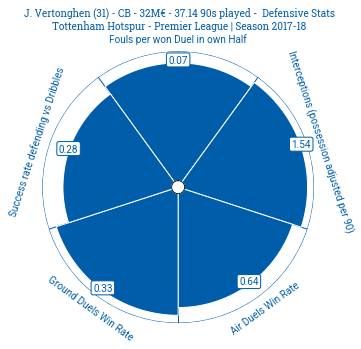

In [13]:
player = "J. Vertonghen"
player_df = df.loc[df["shortName"] == player]
team = player_df.iloc[0,19]
player_df = player_df[["minutesPlayed","foul_per_won_duel_own_half","interceptions_adjusted_per90","air_duels_won%","ground_duels_won%","won_vs_dribbles%"]]
nineties = round(player_df.iloc[0,0]/90,2)
player_columns = player_df.columns[1:]
player_values = [round(player_df[column].iloc[0],2) for column in player_columns]
percentiles = [int(stats.percentileofscore(df[column], player_df[column].iloc[0])) for column in player_columns]
percentiles[0] = 100 - percentiles[0]


#list of names on plots
names = ["Fouls per won Duel in own Half", "Interceptions (possession adjusted per 90)", "Air Duels Win Rate", "Ground Duels Win Rate", "Success rate defending vs Dribbles"]
slice_colors = ["#005DAA"] * 5
text_colors = ["#005DAA"]*5
textbox_colors = ["white"]*5
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    background_color="white",
    straight_line_color="#005DAA",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#005DAA",
    last_circle_lw=1,               # linewidth of last circle
    other_circle_color="#005DAA",
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

#making pizza for our data
fig, ax = baker.make_pizza(
    percentiles,              # list of values
    figsize=(5, 5),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=textbox_colors, # where the parameters will be added
    #        color_blank_space=["#005DAA"]*5,
    #        blank_alpha=1,
    kwargs_slices=dict(
        facecolor="#005DAA", edgecolor="white",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            facecolor="white",edgecolor="#005DAA",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

position = "CB"
value = 32
age = 31

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(player_values[i]))
# add title
fig.text(
    0.515, 0.98, f"{player} ({age}) - {position} - {value}M€ - {nineties} 90s played -  Defensive Stats", size=30,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)

# add subtitle
fig.text(
    0.515, 0.942,
    f"{team} - Premier League | Season 2017-18",
    size=21,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)
plt.savefig(f"{player}_radar.png")
plt.show()

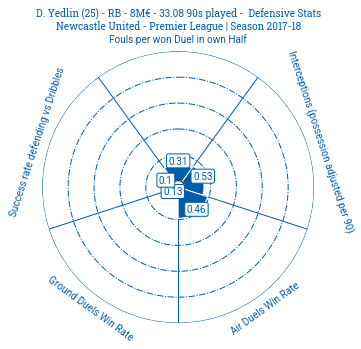

In [14]:
player = "D. Yedlin"
player_df = df.loc[df["shortName"] == player]
team = player_df.iloc[0,19]
player_df = player_df[["minutesPlayed","foul_per_won_duel_own_half","interceptions_adjusted_per90","air_duels_won%","ground_duels_won%","won_vs_dribbles%"]]
nineties = round(player_df.iloc[0,0]/90,2)
player_columns = player_df.columns[1:]
player_values = [round(player_df[column].iloc[0],2) for column in player_columns]
percentiles = [int(stats.percentileofscore(df[column], player_df[column].iloc[0])) for column in player_columns]
percentiles[0] = 100 - percentiles[0]

#list of names on plots
names = ["Fouls per won Duel in own Half", "Interceptions (possession adjusted per 90)", "Air Duels Win Rate", "Ground Duels Win Rate", "Success rate defending vs Dribbles"]
slice_colors = ["#005DAA"] * 5
text_colors = ["#005DAA"]*5
textbox_colors = ["white"]*5
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    background_color="white",
    straight_line_color="#005DAA",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#005DAA",
    last_circle_lw=1,               # linewidth of last circle
    other_circle_color="#005DAA",
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

#making pizza for our data
fig, ax = baker.make_pizza(
    percentiles,              # list of values
    figsize=(5, 5),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=textbox_colors, # where the parameters will be added
    #        color_blank_space=["#005DAA"]*5,
    #        blank_alpha=1,
    kwargs_slices=dict(
        facecolor="#005DAA", edgecolor="white",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#005DAA", fontsize=18,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            facecolor="white",edgecolor="#005DAA",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

position = "RB"
value = 8
age = 25

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(player_values[i]))
# add title
fig.text(
    0.515, 0.98, f"{player} ({age}) - {position} - {value}M€ - {nineties} 90s played -  Defensive Stats", size=30,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)

# add subtitle
fig.text(
    0.515, 0.942,
    f"{team} - Premier League | Season 2017-18",
    size=21,
    ha="center", fontproperties=font_bold.prop, color="#005DAA"
)
plt.savefig(f"{player}_radar.png")
plt.show()